In [17]:
conference = 'nips'
year = '2023'
directory = 'papar-list/'
in_f = f"{directory}{conference}-{year}.txt"
out_f = f"{directory}p-{conference}-{year}.txt"

with open(in_f, "r", encoding="utf-8") as file:
    lines = file.readlines()

results = ['len\tidea\ttarget\ttitle']
for i in range(1, len(lines), 2):  # 从索引1开始，每次跳过2（即单数行）
    title = lines[i].strip()
    # 考虑空格或‘-’的情况下计算标题长度
    original_word_count = len(title.replace('-', ' ').split())
    idea = target = ""

    # 根据不同的关键词分割标题，并确定idea和target的内容
    if ' with ' in title:
        target, idea = title.split(' with ', 1)
    elif ' via ' in title:
        target, idea = title.split(' via ', 1)
    elif ' using ' in title:
        target, idea = title.split(' using ', 1)
    elif ' by ' in title:
        target, idea = title.split(' by ', 1)
    elif ' through ' in title:
        target, idea = title.split(' through ', 1)
    elif ' for ' in title:
        idea, target = title.split(' for ', 1)  # 注意for的处理与其他的不同

    result_line = f"{original_word_count}\t{idea}\t{target}\t{title}"
    results.append(result_line)

with open(out_f, "w", encoding="utf-8") as out_file:
    for result in results:
        out_file.write(result + '\n')


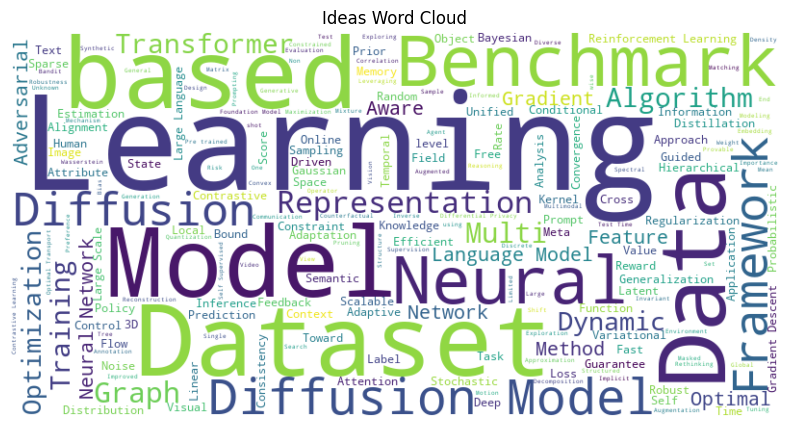

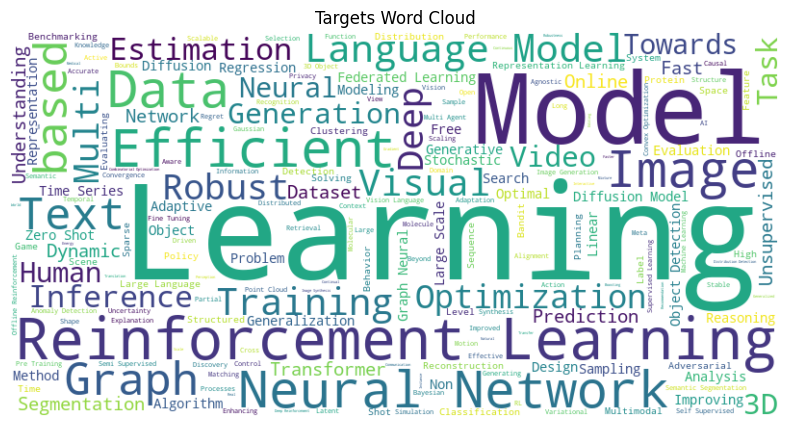

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 假设已经从bb.txt中读取了数据，并且已经分割得到了idea和target的列表
ideas = []
targets = []

with open(out_f, "r", encoding="utf-8") as file:
    for line in file:
        _, idea, target, _ = line.strip().split('\t')
        ideas.append(idea)
        targets.append(target)

# 将列表转换为单个字符串，因为WordCloud需要字符串输入
ideas_text = ' '.join(ideas)
targets_text = ' '.join(targets)

# 为idea生成词云
wordcloud_idea = WordCloud(width=800, height=400, background_color='white').generate(ideas_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_idea, interpolation='bilinear')
plt.axis('off')
plt.title('Ideas Word Cloud')
plt.show()

# 为target生成词云
wordcloud_target = WordCloud(width=800, height=400, background_color='white').generate(targets_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_target, interpolation='bilinear')
plt.axis('off')
plt.title('Targets Word Cloud')
plt.show()


In [15]:
out_file

<_io.TextIOWrapper name='papar-list/p-nips-2023.txt' mode='w' encoding='utf-8'>